# TimeSeries Index

* pd.to_datetime</br>
* pd.date_range</br>
* Year, Month, day 추출하는 방법</br>
* 월별 수익률을 구하는 방법</br>

1. pd.to_datetime
      - 목적 : dtype ‘object’ -> dtype ‘datetime’
      - Ex) df.index = pd.to_datetime(df.index)<br><br>
      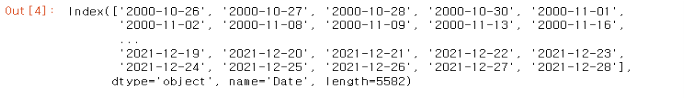
<br>

2. pd.date_range(start = ‘ ’, end=‘ ’, periods = ‘’, freq = ‘’ )
      - 목적: TimeSeries Index를 만들때 주로 사용
<br>

3. TimeSeries Index에서 ‘년’, ‘월’, ‘일’을 구해보기!

In [2]:
import pandas as pd

df = pd.read_csv("../Data/10Y Rate.csv", index_col = 'Date')
df.index

# pd.to_datetime

df.index = pd.to_datetime(df.index)

df

,Close,Open,High,Low,Change
Date,,,,,
2000-10-26,8.300,8.300,8.300,8.300,-0.0060
2000-10-27,8.240,8.240,8.240,8.240,-0.0072
2000-10-28,8.240,8.240,8.240,8.240,0.0000
2000-10-30,8.220,8.220,8.220,8.220,-0.0024
2000-11-01,8.150,8.150,8.150,8.150,-0.0085
...,...,...,...,...,...
2021-12-24,2.210,2.188,2.220,2.185,-0.0023
2021-12-25,2.202,2.202,2.202,2.202,-0.0036
2021-12-26,2.202,2.202,2.202,2.202,0.0000


In [2]:
#pd.date_range()

timeSeries_index = pd.date_range(start = '2000-10-26', end = None, periods = 100)
timeSeries_index

DatetimeIndex(['2000-10-26', '2000-10-27', '2000-10-28', '2000-10-29',
               '2000-10-30', '2000-10-31', '2000-11-01', '2000-11-02',
               '2000-11-03', '2000-11-04', '2000-11-05', '2000-11-06',
               '2000-11-07', '2000-11-08', '2000-11-09', '2000-11-10',
               '2000-11-11', '2000-11-12', '2000-11-13', '2000-11-14',
               '2000-11-15', '2000-11-16', '2000-11-17', '2000-11-18',
               '2000-11-19', '2000-11-20', '2000-11-21', '2000-11-22',
               '2000-11-23', '2000-11-24', '2000-11-25', '2000-11-26',
               '2000-11-27', '2000-11-28', '2000-11-29', '2000-11-30',
               '2000-12-01', '2000-12-02', '2000-12-03', '2000-12-04',
               '2000-12-05', '2000-12-06', '2000-12-07', '2000-12-08',
               '2000-12-09', '2000-12-10', '2000-12-11', '2000-12-12',
               '2000-12-13', '2000-12-14', '2000-12-15', '2000-12-16',
               '2000-12-17', '2000-12-18', '2000-12-19', '2000-12-20',
      

In [3]:
# 년, 월, 일 구하기
df.index.year
df.index.month
df.index.day

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day


In [4]:
df['Condition'] = np.where(df['Month'] == df['Month'].shift(1),0,1)
df['IndexNumber'] = range(df.shape[0])
index_condition_number = df[df['Condition'] == 1]['IndexNumber'].values - 1
df_condition = df.iloc[index_condition_number[1:]]
df_monthly_return = df_condition['Close'].pct_change()
df_monthly_return

Date
2000-10-30         NaN
2000-11-30   -0.057178
2000-12-29   -0.063226
2001-01-31   -0.097796
2001-02-28    0.045802
                ...   
2021-07-31   -0.107553
2021-08-31    0.024103
2021-09-30    0.169979
2021-10-31    0.145731
2021-11-30   -0.134608
Name: Close, Length: 254, dtype: float64

# Format

* 내가 불러온 데이터 형식이 'str'로 되어있다면?

In [ ]:
df = pd.read_csv("../Data/data.csv", encoding = 'cp949') # 한글도 인식할 수 있는 인코딩

lst = []

for i in range(df.shape[0]):
    
    value = df['종가'][i]
    value_change = int(value.replace(',',''))
    lst.append(value_change)

df['종가'] = lst
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      250 non-null    object 
 1   종가      250 non-null    int64  
 2   대비      250 non-null    int64  
 3   등락률     250 non-null    float64
 4   시가      250 non-null    object 
 5   고가      250 non-null    object 
 6   저가      250 non-null    object 
 7   거래량     250 non-null    object 
 8   거래대금    250 non-null    object 
 9   가중평균    250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [6]:
df = pd.read_csv("data.csv", encoding = 'cp949')

df['종가'] = [int(value.replace(',','')) for value in df['종가']]

df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      250 non-null    object 
 1   종가      250 non-null    int64  
 2   대비      250 non-null    int64  
 3   등락률     250 non-null    float64
 4   시가      250 non-null    object 
 5   고가      250 non-null    object 
 6   저가      250 non-null    object 
 7   거래량     250 non-null    object 
 8   거래대금    250 non-null    object 
 9   가중평균    250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [7]:
df = pd.read_csv("data.csv", encoding = 'cp949', thousands = ',')
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2022-01-06,35050,0,0.00,0,0,0,0,0,0
1,2022-01-05,35050,-50,-0.14,35250,35300,35050,8000,281875000,35234
2,2022-01-04,35100,0,0.00,35100,35200,35100,4800,168580000,35121
3,2022-01-03,35100,0,0.00,35100,35100,35100,4200,147420000,35100
4,2021-12-30,35100,50,0.14,35100,35150,35050,48348,1697057400,35101
...,...,...,...,...,...,...,...,...,...,...
245,2021-01-12,19800,0,0.00,0,0,0,0,0,0
246,2021-01-11,19800,0,0.00,0,0,0,0,0,0
247,2021-01-08,23000,0,0.00,0,0,0,0,0,0
248,2021-01-07,23000,0,0.00,0,0,0,0,0,0


# 기초통계

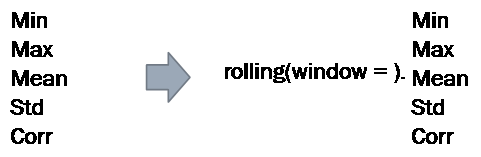

In [ ]:
import pandas as pd

df = pd.read_csv("../Data/10Y Rate.csv", index_col = 'Date')
df.index = pd.to_datetime(df.index)

df

,Close,Open,High,Low,Change
Date,,,,,
2000-10-26,8.300,8.300,8.300,8.300,-0.0060
2000-10-27,8.240,8.240,8.240,8.240,-0.0072
2000-10-28,8.240,8.240,8.240,8.240,0.0000
2000-10-30,8.220,8.220,8.220,8.220,-0.0024
2000-11-01,8.150,8.150,8.150,8.150,-0.0085
...,...,...,...,...,...
2021-12-24,2.210,2.188,2.220,2.185,-0.0023
2021-12-25,2.202,2.202,2.202,2.202,-0.0036
2021-12-26,2.202,2.202,2.202,2.202,0.0000


In [9]:
df.min()
df.max()
df.std()
df.corr()

,Close,Open,High,Low,Change
Close,1.000000,0.999300,0.999315,0.999326,0.023822
Open,0.999300,1.000000,0.999952,0.999945,-0.005237
High,0.999315,0.999952,1.000000,0.999897,-0.003110
Low,0.999326,0.999945,0.999897,1.000000,-0.003039
Change,0.023822,-0.005237,-0.003110,-0.003039,1.000000


In [10]:
df.rolling(window = 30).min()
df.rolling(window = 30).max()
df.rolling(window = 30).mean()
df.rolling(window = 30).std()
df.rolling(window = 30).corr()



Close      Open      High       Low    Change
Date                                                               
2000-10-26 Close        NaN       NaN       NaN       NaN       NaN
           Open         NaN       NaN       NaN       NaN       NaN
           High         NaN       NaN       NaN       NaN       NaN
           Low          NaN       NaN       NaN       NaN       NaN
           Change       NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2021-12-28 Close   1.000000  0.783889  0.870604  0.876691  0.261900
           Open    0.783889  1.000000  0.898278  0.888645 -0.293861
           High    0.870604  0.898278  1.000000  0.780965 -0.061231
           Low     0.876691  0.888645  0.780965  1.000000  0.000477
           Change  0.261900 -0.293861 -0.061231  0.000477  1.000000

[27910 rows x 5 columns]